<a href="https://colab.research.google.com/github/patriciamediavilla/L1P2/blob/main/ventasUS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualización de datos
## Volúmenes de venta US con predicciones

#### Patricia Mediavilla

El objetivo de este proyecto es responder a las siguientes cuestiones utilizando en cada caso el diagrama más conveniente:

¿Cuáles son las 5 combinaciones de canal-producto con más volumen de cada customer?

¿Cuál es el error cuadrático medio de cada modelo de las series de la pregunta anterior?

¿Cuáles son las previsiones de los 2 mejores modelos de cada customer de las series de la pregunta anterior?

## Desarrollo
### Importación de librerías

In [44]:
pip install plotly_express

Importamos las librerias que vamos a necesitar para la ejecución de nuestro proyecto.

In [45]:
import plotly_express as px
import pandas as pd
import matplotlib.pyplot as plt

## Lectura y limpieza de la base de datos

Lo primero que debemos hacer es importar la base de datos para poder comprenderla y ver la limpieza y los cambios que necesita.

En este caso tenemos una base de datos que nos proporciona los volúmenes de venta de Estados Unidos.

In [46]:
df = pd.read_csv('volume_us_forecast_sample.csv', sep=',')
df

<ipython-input-46-74552a55b750>:1: DtypeWarning: Columns (11,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('volume_us_forecast_sample.csv', sep=',')


,COUNTRY,GEOGRAPHY,CUSTOMER,SEGMENT/CHANNEL,PRODUCT,YEAR,WEEK,SCENARIO,SCENARIO_LVL_2,AMOUNT,MODEL_ID,MODEL_CAT,DEFAULT_MODEL,FORECAST_YEAR,FORECAST,UNIT,AMOUNT_WITHOUT_OUTLIERS
0,United States,West,AO_FTN_US,CG3_Z59,L2488,2023,20,AI_forecast,Volume,-5.084845,1.0,Prophet,1,2023.0,W12F,Gallons,NaN
1,United States,West,AO_FTN_US,CG3_Z59,L2488,2023,21,AI_forecast,Volume,9.696815,1.0,Prophet,1,2023.0,W12F,Gallons,NaN
2,United States,West,AO_FTN_US,CG3_Z59,L2488,2023,22,AI_forecast,Volume,-5.896414,1.0,Prophet,1,2023.0,W12F,Gallons,NaN
3,United States,West,AO_FTN_US,CG3_Z59,L2488,2023,23,AI_forecast,Volume,0.544680,1.0,Prophet,1,2023.0,W12F,Gallons,NaN
4,United States,West,AO_FTN_US,CG3_Z59,L2488,2023,24,AI_forecast,Volume,8.710286,1.0,Prophet,1,2023.0,W12F,Gallons,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1831288,United States,Central,1000007206,CG2_Z27,L2399,2023,11,AI_forecast,Volume,0.003348,0.0,Prophet,0,2023.0,W07F,Gallons,NaN
1831289,United States,Central,1000007206,CG2_Z27,L2399,2023,12,AI_forecast,Volume,0.005433,0.0,Prophet,0,2023.0,W07F,Gallons,NaN
1831290,United States,Central,1000007206,CG2_Z27,L2399,2023,13,AI_forecast,Volume,0.007053,0.0,Prophet,0,2023.0,W07F,Gallons,NaN
1831291,United States,Central,1000007206,CG2_Z27,L2399,2023,14,AI_forecast,Volume,0.005785,0.0,Prophet,0,2023.0,W07F,Gallons,NaN


Como hemos dicho es el volumen de venta de Estados Unidos. Vamos a comprender cada una de las variavles para poder comprender así en contexto cada fila de nuestro data set.

Las variables que encontramos son:
- COUNTRY: el país que va a ser siempre EEUU
- GEOGRAPHY: en que parte del país se ubica
- CUSTOMER: el comprador
- SEGMENT/CHANNEL: el canal que se utiliza
- PRODUCT: el producto que se compra
- YEAR: el año de venta
- WEEK: la semana de venta
- SCENARIO: el escenario en el que estamos, si es prediccion o no
- SCENARIO_LVL_2: el escenario
- AMOUNT: la cantidad que ha costado
- MODEL_ID: el modelo que se ha usado para predecir (solo tiene valor en los predichos)
- MODEL_CAT: modelo
- DEFAULT_MODEL: modelo
- FORECAST_YEAR: año de predicion
- FORECAST: tipo de predicción
- UNIT: unidades
- AMOUNT_WITHOUT_OUTLIERS

Vamos a hacer un pequeño procesamiento de los datos.

Primero vamos a ver si hay valores faltantes en neustra BBDD

In [4]:
df.isnull().sum()

COUNTRY                          0
GEOGRAPHY                        0
CUSTOMER                         0
SEGMENT/CHANNEL                  0
PRODUCT                          0
YEAR                             0
WEEK                             1
SCENARIO                         1
SCENARIO_LVL_2                   1
AMOUNT                           1
MODEL_ID                    349375
MODEL_CAT                   349375
DEFAULT_MODEL                    1
FORECAST_YEAR               349375
FORECAST                    349375
UNIT                             1
AMOUNT_WITHOUT_OUTLIERS    1657833
dtype: int64

Como vemos si que hay valores faltantantes, en los que solo hay uno es por la última fila de la BBDD que tiene bastantes NA, por eso lo primero va a ser eliminarla.

Para continuar, las varibales que tienen tantos datos faltantes no habría que eliminarlo, porque por ejemplo las variables que están realacionada con predecir, son las que tienen NA y esto es porque los valores que son actuales y no predichos no tienen valor para esas variables, por lo que así lo dejaríamos.

In [5]:
df = df.iloc[:, :-1]


Una vez hemos lidiado con los valores faltantes vamos a ver si los valores de los datos tienen sentido.

In [6]:
df.describe()


,YEAR,WEEK,AMOUNT,MODEL_ID,DEFAULT_MODEL,FORECAST_YEAR
count,1.657833e+06,1.657832e+06,1.657832e+06,1.308458e+06,1.657832e+06,1308458.0
mean,2.022769e+03,1.951044e+01,7.908507e+03,5.261231e-01,6.259886e-01,2023.0
std,1.658267e+00,9.945062e+00,4.404533e+04,4.993173e-01,4.838667e-01,0.0
min,2.000000e+01,1.000000e+00,-1.505253e+05,0.000000e+00,0.000000e+00,2023.0
25%,2.023000e+03,1.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2023.0
50%,2.023000e+03,1.900000e+01,1.403783e+01,1.000000e+00,1.000000e+00,2023.0
75%,2.023000e+03,2.600000e+01,6.755929e+02,1.000000e+00,1.000000e+00,2023.0
max,2.023000e+03,5.300000e+01,1.552496e+06,1.000000e+00,1.000000e+00,2023.0


Todos los valores de los datos son correctos y válidos a excepción de la variable AMOUNT que no podría contener valores negativos, por eso vamos a corregirlo.

In [7]:
df['AMOUNT'] = df['AMOUNT'].clip(lower=0)

resumen = df['AMOUNT'].describe()
resumen

count    1.657832e+06
mean     7.995864e+03
std      4.397476e+04
min      0.000000e+00
25%      0.000000e+00
50%      1.403783e+01
75%      6.755929e+02
max      1.552496e+06
Name: AMOUNT, dtype: float64

In [8]:
df.isnull().sum()

COUNTRY                 0
GEOGRAPHY               0
CUSTOMER                0
SEGMENT/CHANNEL         0
PRODUCT                 0
YEAR                    0
WEEK                    1
SCENARIO                1
SCENARIO_LVL_2          1
AMOUNT                  1
MODEL_ID           349375
MODEL_CAT          349375
DEFAULT_MODEL           1
FORECAST_YEAR      349375
FORECAST           349375
UNIT                    1
dtype: int64

Una vez observado y corregido todas las variables numéricas vamos a ver la ocurrencia de los valores de las valiares categóricas.

In [9]:
# Lista de columnas
columnas = ['COUNTRY','GEOGRAPHY','CUSTOMER','SEGMENT/CHANNEL','PRODUCT','SCENARIO','SCENARIO_LVL_2','MODEL_CAT','FORECAST','UNIT']

# Itera a través de las columnas y muestra el conteo de valores únicos
for columna in columnas:
    conteo_valores = df[columna].value_counts()
    print(f'Conteo de valores en la columna "{columna}":')
    print(conteo_valores)
    print('\n')

Conteo de valores en la columna "COUNTRY":
United States    1657833
Name: COUNTRY, dtype: int64


Conteo de valores en la columna "GEOGRAPHY":
South      530635
Central    412637
North      369890
West       344671
Name: GEOGRAPHY, dtype: int64


Conteo de valores en la columna "CUSTOMER":
1000006156    694906
AO_FTN_US     334944
1000007206    307545
1000008742    201792
1000007013    118646
Name: CUSTOMER, dtype: int64


Conteo de valores en la columna "SEGMENT/CHANNEL":
CG2_Z01          416632
CG2_Z19          293453
CG2_Z16          257483
CG2_Z30          109139
CG2_Z08           81583
CG2_Z27           75304
CG3_Z59           41392
CG2_Z10           27746
CG2_Z17           22371
2FS               19113
CG3_Z24           18593
CG3_Z36           18576
CG3_Z01           18561
CG3_Z34           18554
ZZ_FSV_FTN_US     18546
CG3_Z81           18524
CG3_Z49           18520
CG3_Z55           18512
1FS               18488
CG3_Z20           18486
CG3_Z04           18462
CG3_Z35           

Tras entender bien los valores vemos que no hay ningún outlier ni valores extraños.

Por lo que una vez procesados los datos podemos empezar con el trabajo y responder a las preguntas.

## 1. ¿Cuáles son las 5 combinaciones de canal-producto con más volumen de cada cliente?

Para poder responder a la primera pregunta, debemos sacar las combinaciones de canal-producto con más valor de amount de cada cliente.

In [10]:
#Seleccionamos de los actuals
df1 = df[df["SCENARIO"]=='actual']

# Agrupa por cliente, canal y producto, y suma el volumen
comb = df1.groupby(['CUSTOMER', 'SEGMENT/CHANNEL', 'PRODUCT'])['AMOUNT'].sum().reset_index()

# Ordena en orden descendente y obtén las 5 combinaciones principales por cliente
top_combinaciones = comb.groupby('CUSTOMER').apply(lambda x: x.nlargest(5, 'AMOUNT')).reset_index(drop=True)

df_actual = top_combinaciones
df_actual

,CUSTOMER,SEGMENT/CHANNEL,PRODUCT,AMOUNT
0,1000006156,CG2_Z19,L2296,2.348116e+08
1,1000006156,CG2_Z19,L2254,2.144173e+08
2,1000006156,CG2_Z19,L2306,1.070945e+08
3,1000006156,CG2_Z19,L2291,8.475402e+07
4,1000006156,CG2_Z19,L2315,6.313752e+07
5,1000007013,CG2_Z30,L2254,2.121324e+08
6,1000007013,CG2_Z30,L2300,1.529058e+08
7,1000007013,CG2_Z30,L2381,4.027156e+07
8,1000007013,CG2_Z30,L2313,1.881108e+07
9,1000007013,CG2_Z30,L2264,1.566798e+07


Una vez tenemos un data set en el cual aparece el customer y las 5 combinaciones de canal producto con más volumen de venta podemos graficar estas con un diagrama de tarta para ver la proporción de las ventas de cada canal-producto perteneciente a cada costumer, esto es un gráfico interesante, sin embargo no es lo mismo una proporción en la que el mayor amount sea 100 que que sea 1000000.  

Por lo que vamos a graficar también en forma de barras ya que se puede ver la diferencia de volumen de ventas a simple vista, utilizando valores numéricos

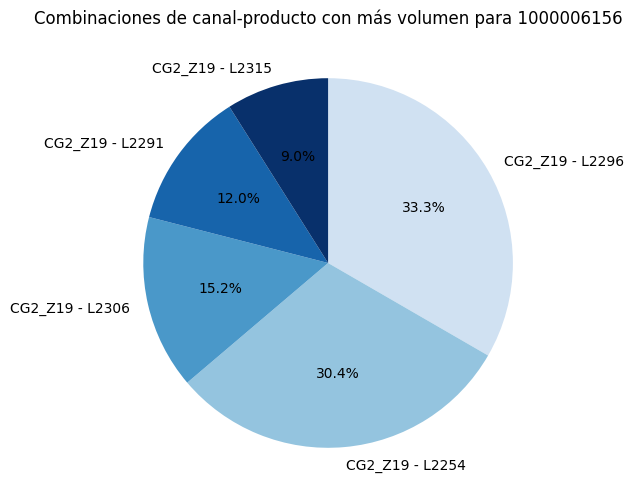

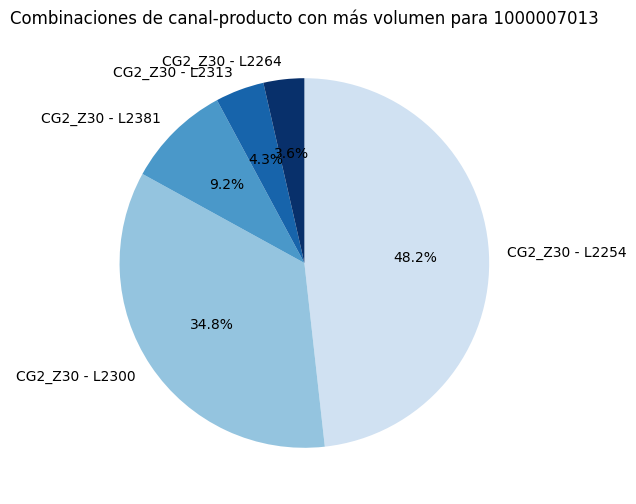

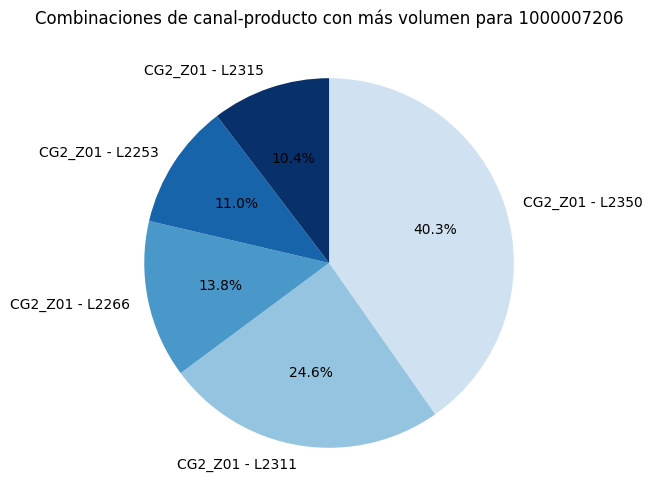

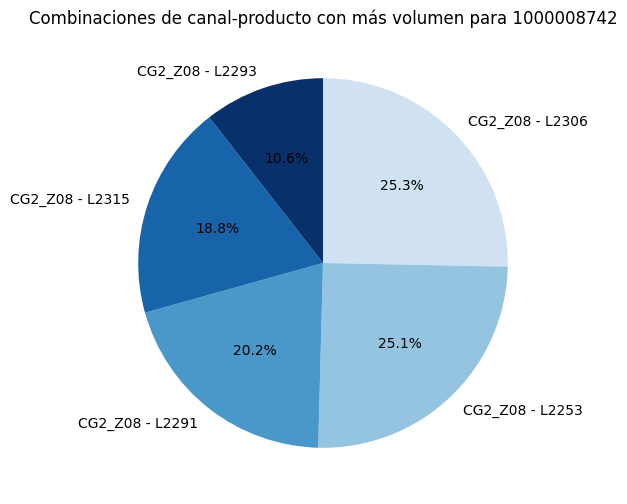

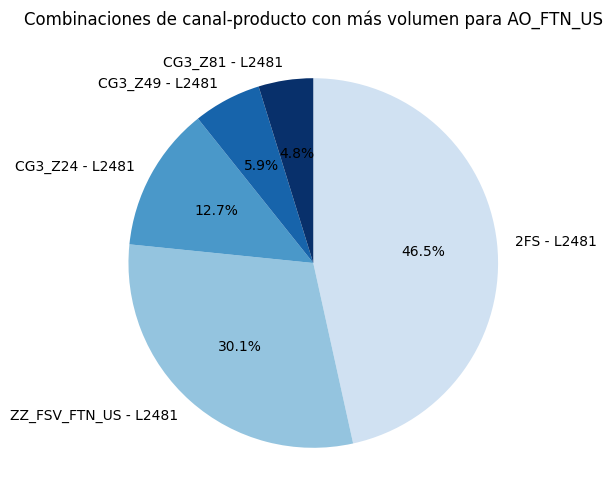

In [11]:
import numpy as np
colores = plt.cm.Blues(np.linspace(0.2, 1, 5))

for customer, customer_data in df_actual.groupby('CUSTOMER'):
    plt.figure(figsize=(10, 6))
    plt.pie(customer_data['AMOUNT'], labels=customer_data['SEGMENT/CHANNEL'] + ' - ' + customer_data['PRODUCT'],
            colors=colores, autopct='%1.1f%%', startangle=90, counterclock=False)
    plt.title(f'Combinaciones de canal-producto con más volumen para {customer}')
    plt.show()

In [53]:
import plotly.express as px

# Agrupamos
data_bestComb = df_actual.groupby(['CUSTOMER', 'SEGMENT/CHANNEL', 'PRODUCT'])['AMOUNT'].sum().reset_index()

# Diferentes customers que tiene la base de datos
customer_list = data_bestComb['CUSTOMER'].unique()

# Definir colores
colores = ['#87CEEB'] * 5

# Para cada customer, vamos a tomar los 5 mejores canales-productos, es decir,
# el que tenga más volumen de venta
for customer in customer_list:
    customer_data = data_bestComb[data_bestComb['CUSTOMER'] == customer]
    top_channel_product = customer_data.sort_values(by='AMOUNT', ascending=False).head(5)
    top_channel_product['channel_product'] = top_channel_product['SEGMENT/CHANNEL'] + " - " + top_channel_product['PRODUCT']

    # Graficamos con Plotly Express
    fig = px.bar(top_channel_product, x='AMOUNT', y='channel_product', text='AMOUNT',
                 title=f'Customer: {customer}', labels={'AMOUNT': 'Volumen'},
                 color_discrete_sequence=colores)

    fig.update_layout(xaxis_title='Combinación de Canal-Producto', yaxis_title='Volumen')

    # Mostrar la figura
    fig.show()


Como se ha explicado, en las primeras gráficas vemos de cada costumer (cada gráfica) la proporción de volumen de cada combinación canal-producto. Observamos solo las 5 combinaciones con más volumen de cada costumer por lo que la proporción es entre los 5 con más ventas no en general de ese cliente.

Y las segundas gráficas, también cada gráfica pertenece a cada cliente, y en estas vemos realmente cual es la cantidad de ventas de cada combinación canal-producto.

## 2. ¿Cuál es el error cuadrático medio de cada modelo de las series de la pregunta anterior?



Para la realización de esta pregunta debemos entender bien la base de datos que estamos utilizando. Ya que tenemos varias semanas y a cada semana se le van uniendo nuevas predicciones.

Lo que debemos hacer es el error cuadrático medio de cada combinacion de cliente, canal y producto.

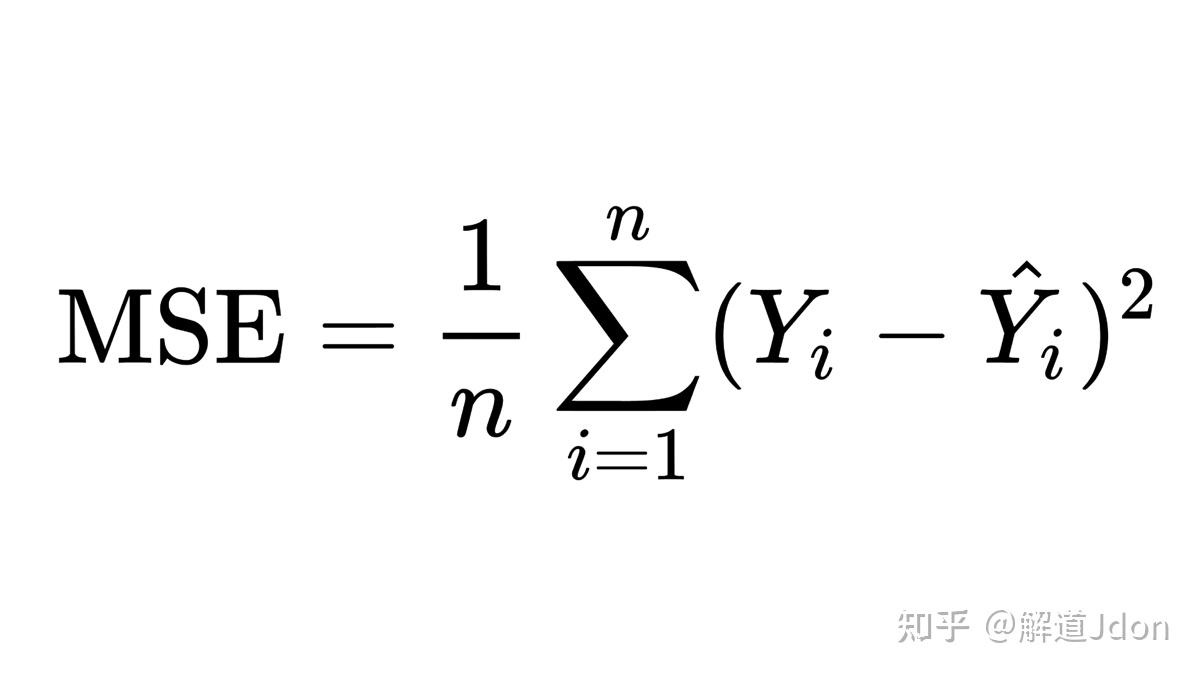

Para hacer este paso, necesitamos mirar a cómo evoluciona el tiempo para cada combinación de canal y producto.  Primero, vamos a recoger todas las predicciones que hicimos en función de los "forecasts". Luego, para evaluar qué tan acertadas fueron esas predicciones, calculamos el error cuadrático para cada una. Después, obtenemos el promedio de esos errores para cada semana, y finalmente, hacemos el promedio de esos promedios semanales. Esto nos da una idea del error total en las ventas para cada cliente, canal y producto.







In [68]:
df2 = df[df["SCENARIO"]=='AI_forecast']

In [69]:
# Filtra df1
actual = df1[['CUSTOMER', 'SEGMENT/CHANNEL', 'PRODUCT', 'YEAR', 'WEEK', 'AMOUNT']]

# Filtra df2 para el modelo 0 y selecciona las columnas relevantes
df2_0 = df2[(df2['MODEL_ID'] == 0)][['CUSTOMER', 'SEGMENT/CHANNEL', 'PRODUCT', 'YEAR', 'WEEK', 'FORECAST', 'AMOUNT']]

# Filtra df2 para el modelo 1 y selecciona las columnas relevantes
df2_1 = df2[(df2['MODEL_ID'] == 1)][['CUSTOMER', 'SEGMENT/CHANNEL', 'PRODUCT', 'YEAR', 'WEEK', 'FORECAST', 'AMOUNT']]

# Convierte las columnas YEAR y WEEK a formato de fecha en actual y en las previsiones
actual['DATE'] = pd.to_datetime(actual['YEAR'].astype(int).astype(str) + '-' + actual['WEEK'].astype(int).astype(str) + '-' + '1', format='%Y-%W-%w')
df2_0['DATE'] = pd.to_datetime(df2_0['YEAR'].astype(int).astype(str) + '-' + df2_0['WEEK'].astype(int).astype(str) + '-' + '1', format='%Y-%W-%w')
df2_1['DATE'] = pd.to_datetime(df2_1['YEAR'].astype(int).astype(str) + '-' + df2_1['WEEK'].astype(int).astype(str) + '-' + '1', format='%Y-%W-%w')


<ipython-input-69-43c068f075d4>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [70]:
df_final_0 = actual.merge(df2_0, left_on=['DATE', 'CUSTOMER', 'SEGMENT/CHANNEL', 'PRODUCT'], right_on=['DATE', 'CUSTOMER', 'SEGMENT/CHANNEL', 'PRODUCT'], how='inner', suffixes=('_actual', '_ai_forecast_0'))

df_final_1 = actual.merge(df2_1, left_on=['DATE', 'CUSTOMER', 'SEGMENT/CHANNEL', 'PRODUCT'], right_on=['DATE', 'CUSTOMER', 'SEGMENT/CHANNEL', 'PRODUCT'], how='inner', suffixes=('_actual', '_ai_forecast_1'))


Hasta aqui hemos preparado las bases de datos con las cuales vamos a calcular el MSE.

A continuación haremos las diferencias al cuadrado como una columa más de nuestro data set y así poder agrupar por Cliente, canal y producto y hacer la media de los errores cuadráticos, como hemos explicado antes.

In [71]:
df_final_0['MSE'] = ((df_final_0['AMOUNT_actual'] - df_final_0['AMOUNT_ai_forecast_0'])**2)
df_final_1['MSE'] = ((df_final_1['AMOUNT_actual'] - df_final_1['AMOUNT_ai_forecast_1'])**2)

In [72]:
df_final_00 = df_final_0.groupby(['CUSTOMER', 'SEGMENT/CHANNEL', 'PRODUCT'])['MSE'].mean().reset_index()
df_final_11 = df_final_1.groupby(['CUSTOMER', 'SEGMENT/CHANNEL', 'PRODUCT'])['MSE'].mean().reset_index()

In [73]:
# Combina los resultados en un solo DataFrame
df_combined_mse = pd.merge(df_final_00, df_final_11, on=['CUSTOMER', 'SEGMENT/CHANNEL', 'PRODUCT'], suffixes=('_Model_0', '_Model_1'))

In [74]:
# Filtrar df_combined_mse para las combinaciones presentes en df_actual
df_combined_mse = df_combined_mse[df_combined_mse.set_index(['CUSTOMER', 'SEGMENT/CHANNEL', 'PRODUCT']).index.isin(df_actual.set_index(['CUSTOMER', 'SEGMENT/CHANNEL', 'PRODUCT']).index)]

# Calcular la media del MSE para las combinaciones presentes en df_actual
mean_mse_by_combination = df_combined_mse.groupby(['CUSTOMER', 'SEGMENT/CHANNEL', 'PRODUCT'])[['MSE_Model_0', 'MSE_Model_1']].mean()


Una vez realizado esto vamos a proceder a graficar nuestros errores cuadráticos por cliente, canal y producto de la misma manera que hemos hecho en el ejercicio 1.

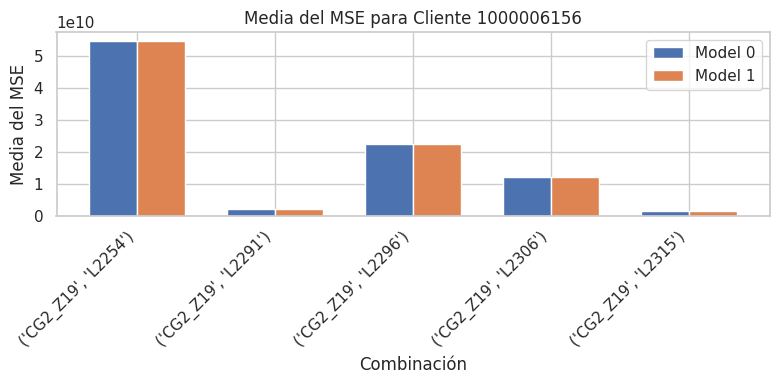

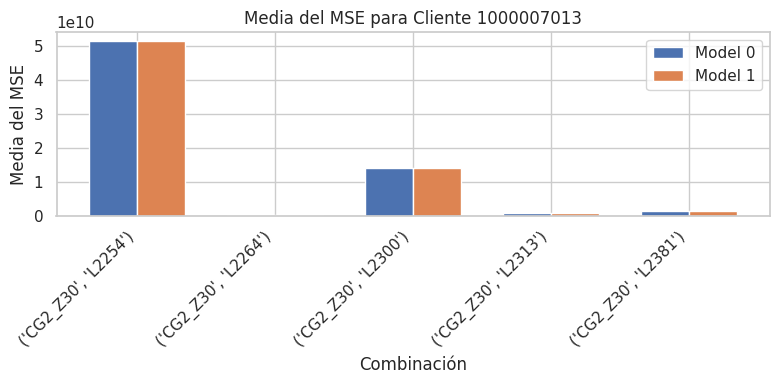

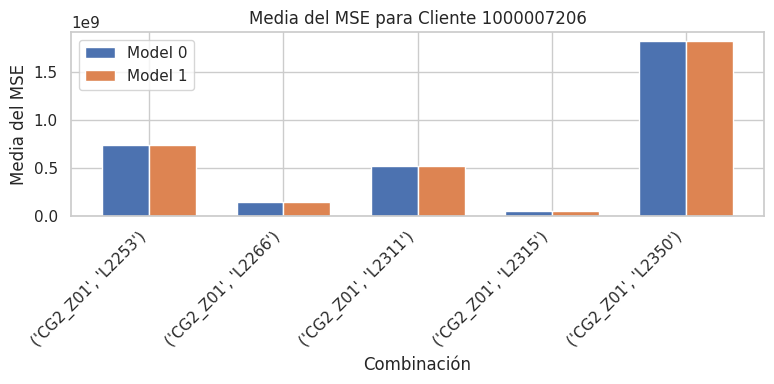

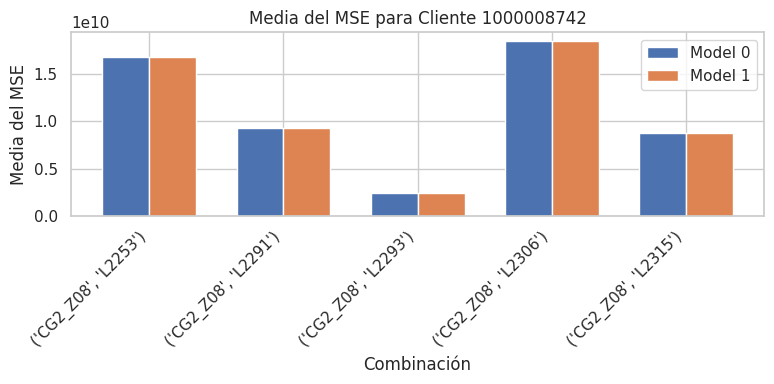

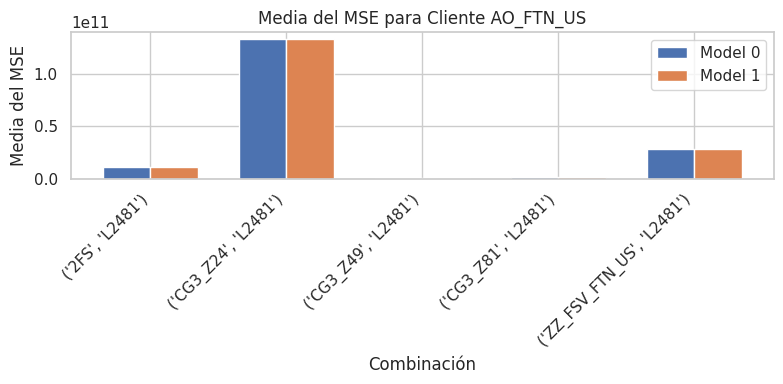

In [81]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

# Obtener la lista de clientes únicos
unique_customers = mean_mse_by_combination.index.get_level_values('CUSTOMER').unique()

# Iterar sobre cada cliente y generar una gráfica para cada uno
for customer in unique_customers:
    # Filtrar el DataFrame para el cliente específico
    df_customer = mean_mse_by_combination.loc[customer]

    fig, ax = plt.subplots(figsize=(8, 4))

    bar_positions = range(len(df_customer))

    bar_width=0.35

    # Graficar las medias del MSE para Model 0 y Model 1
    ax.bar(bar_positions, df_customer['MSE_Model_0'], bar_width, label='Model 0')
    ax.bar([pos + bar_width for pos in bar_positions], df_customer['MSE_Model_1'], bar_width, label='Model 1')

    # Configurar etiquetas y título para el cliente actual
    ax.set_xlabel('Combinación')
    ax.set_ylabel('Media del MSE')
    ax.set_title(f'Media del MSE para Cliente {customer}')
    ax.set_xticks([pos + bar_width/2 for pos in bar_positions])
    ax.set_xticklabels(df_customer.index, rotation=45, ha='right')

    # Agregar leyenda
    ax.legend()

    # Mostrar la gráfica
    plt.tight_layout()
    plt.show()


Estos gráficos de barras, cada uno representa un cliente. Visualizamos 10 barras agrupadas de dos en dos, las que se encuentran agrupadas son el MSE de cada uno de los modelos, el modelo 0 en azul y el modelo 1 en naranja. Y así para las 5 combinaciones de canal-producto que anteriormente hemos seleccionado por tener mayor volumen de ventas.

Lo que podemos sacar de estas gráficas es que los errores son bastante variables, entre las distintas combinaciones de canal- producto.

Y que tanto el modelo 0 como el modelo 1 predicen lo mismo, ya que dan en mismo MSE para todas las combinaciones, por esta razón vamos a utilizar solo un modelo en el siguente ejercicio para simplificar el problema.

## 3. ¿Cuáles son las previsiones de los 2 mejores modelos de cada customer de las series de la pregunta anterior?

En esta pregunta se entiende que debemos sacar de cada cliente sus dos mejores combinaciones, es decir, que tengan el menor MSE, de los calculados en el ejercicio anterior.

Para ello volvemos a preparar nuestars bases de datos, filtramos cuales son las dos combinaciones de cada cliente con menor error cuadrático medio, y graficamos los valores actuales con la media de los valores predichos, la media por semana, en algunos habrá más datos que en otros, por eso hacemos la media.

In [77]:
actual_actual = df1.groupby(['CUSTOMER', 'SEGMENT/CHANNEL', 'PRODUCT','YEAR','WEEK'])['AMOUNT'].mean().reset_index()
forecast_forecast = df2.groupby(['CUSTOMER', 'SEGMENT/CHANNEL', 'PRODUCT','YEAR','WEEK'])['AMOUNT'].mean().reset_index()

In [78]:
# Sumar el MSE por cliente y ordenar de menor a mayor
mse_by_customer = df_combined_mse.groupby('CUSTOMER')[['MSE_Model_0', 'MSE_Model_1']].sum().sum(axis=1)
mse_by_customer = mse_by_customer.sort_values()


In [79]:
# Filtrar la DataFrame original con las combinaciones seleccionadas
filtered_df_actual = actual_actual[actual_actual.set_index(['CUSTOMER', 'SEGMENT/CHANNEL', 'PRODUCT',]).index.isin(selected_combinations.set_index(['CUSTOMER', 'SEGMENT/CHANNEL', 'PRODUCT']).index)]

# Filtrar la DataFrame original con las combinaciones seleccionadas
filtered_df_forecast = forecast_forecast[forecast_forecast.set_index(['CUSTOMER', 'SEGMENT/CHANNEL', 'PRODUCT',]).index.isin(selected_combinations.set_index(['CUSTOMER', 'SEGMENT/CHANNEL', 'PRODUCT']).index)]


# Obtenemos la fecha en una columna en vez de tenerlas separadas en dos distintas
filtered_df_actual['DATE'] = pd.to_datetime(filtered_df_actual['YEAR'].astype(int).astype(str) + '-' + filtered_df_actual['WEEK'].astype(int).astype(str) + '-' + '1', format='%Y-%W-%w')
filtered_df_forecast['DATE'] = pd.to_datetime(filtered_df_forecast['YEAR'].astype(int).astype(str) + '-' + filtered_df_forecast['WEEK'].astype(int).astype(str) + '-' + '1', format='%Y-%W-%w')


<ipython-input-79-23c9e1dc2480>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-79-23c9e1dc2480>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Cuando hemos preparado las bases de datos, filtrado por las combinaciones que queríamos y habiendo hecho las operaciones oportunas, graficamos las series temporales.

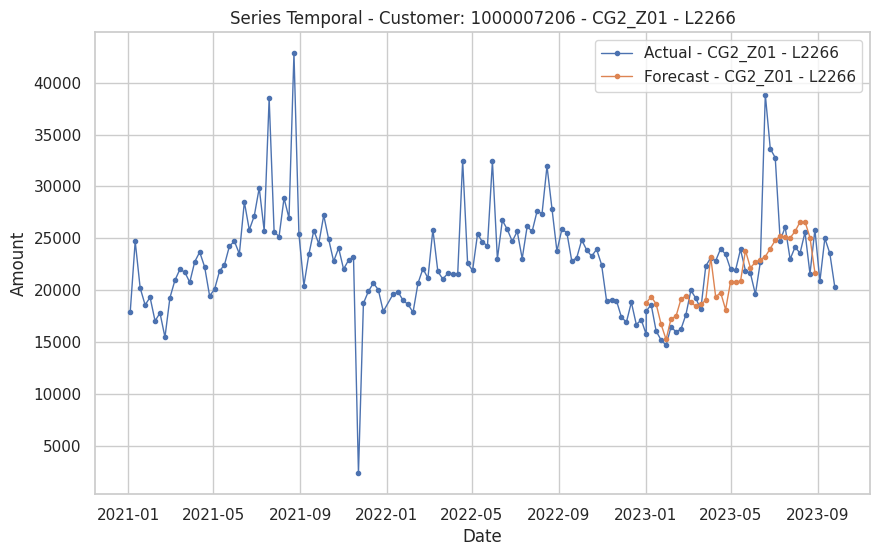

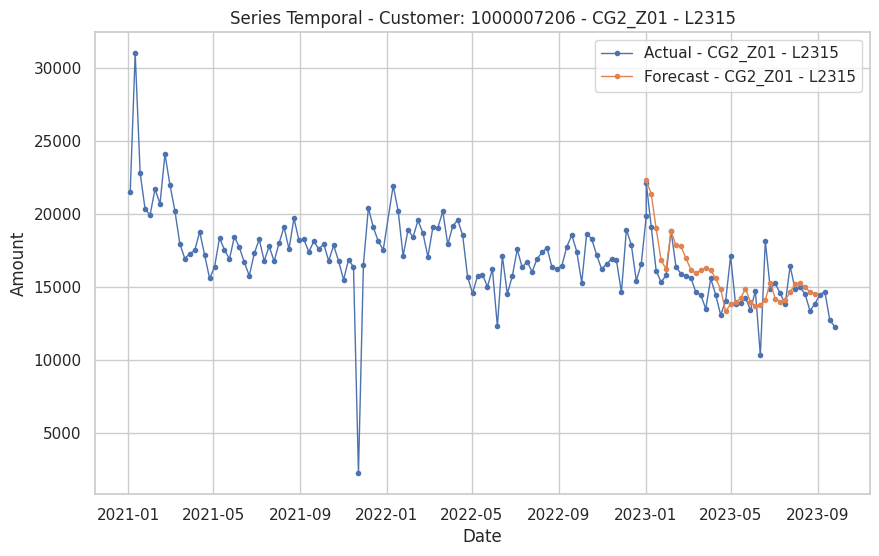

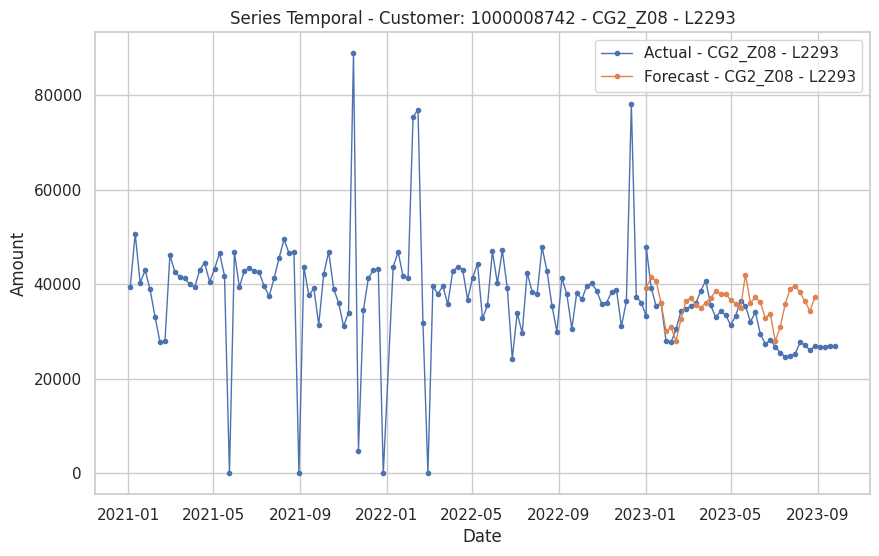

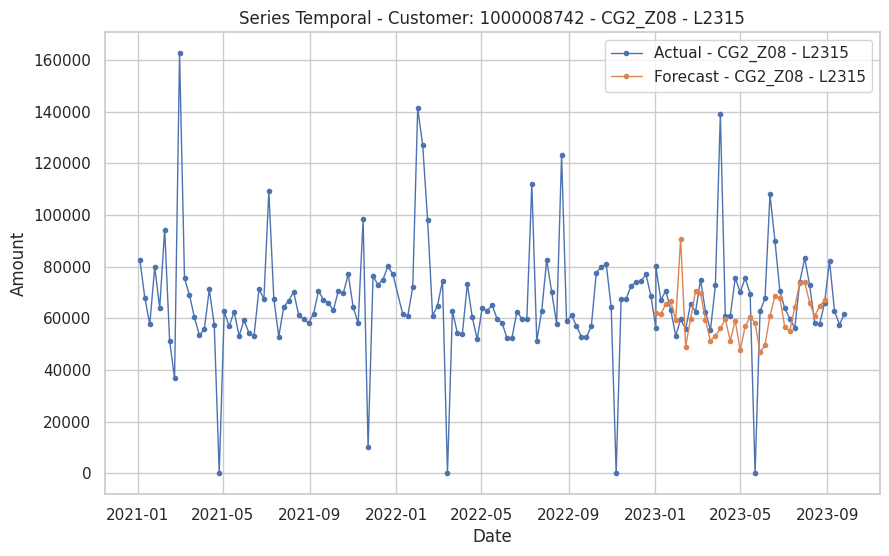

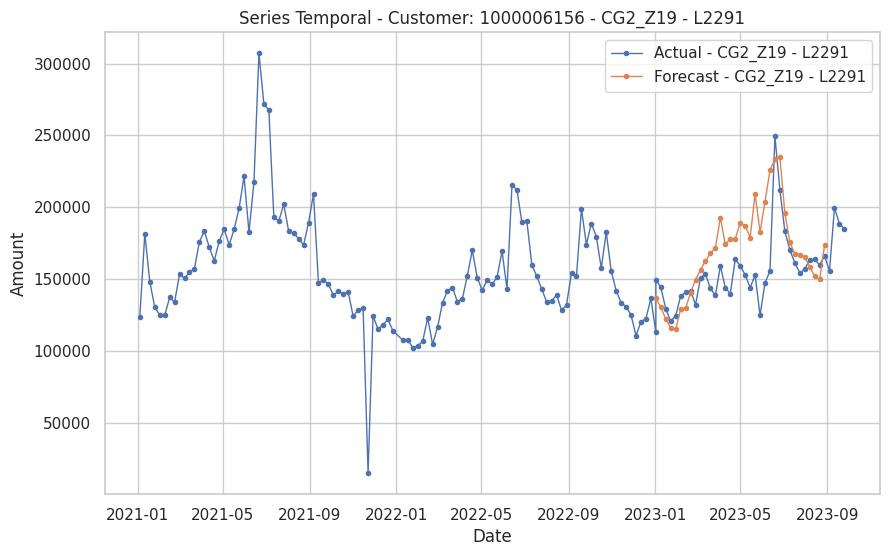

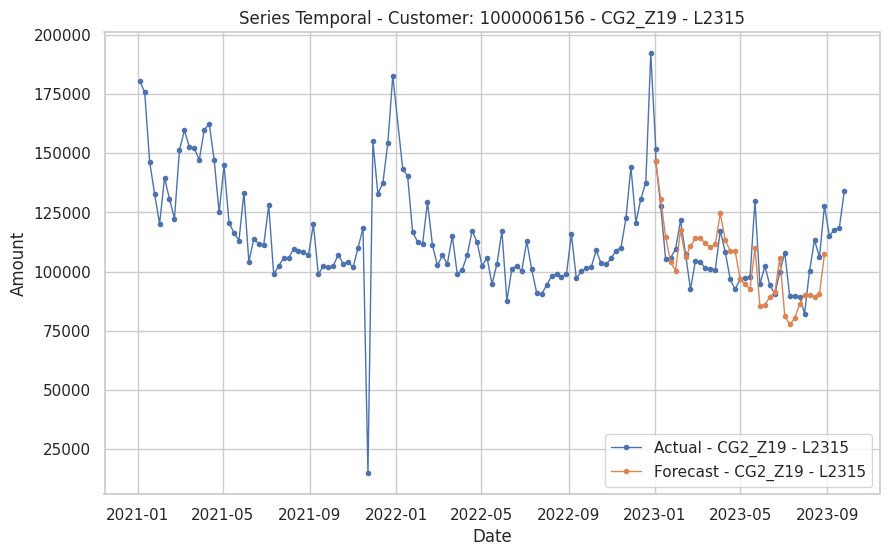

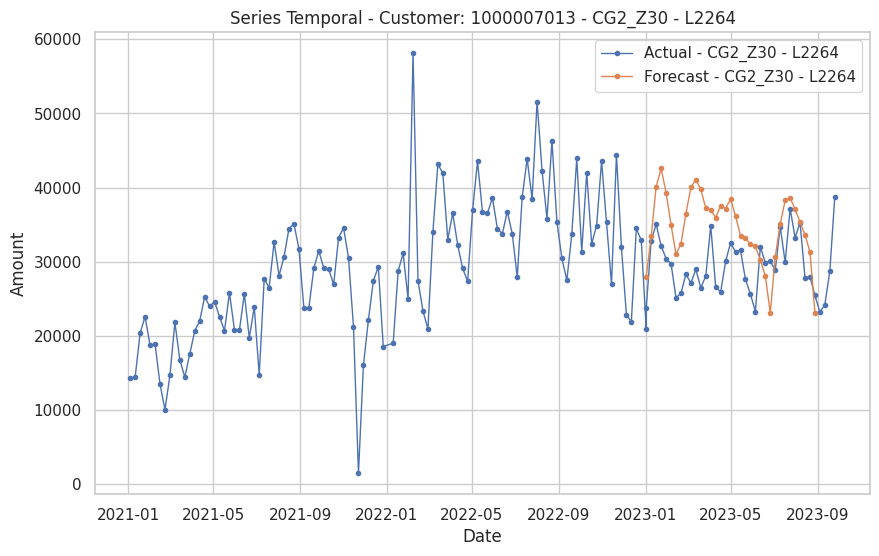

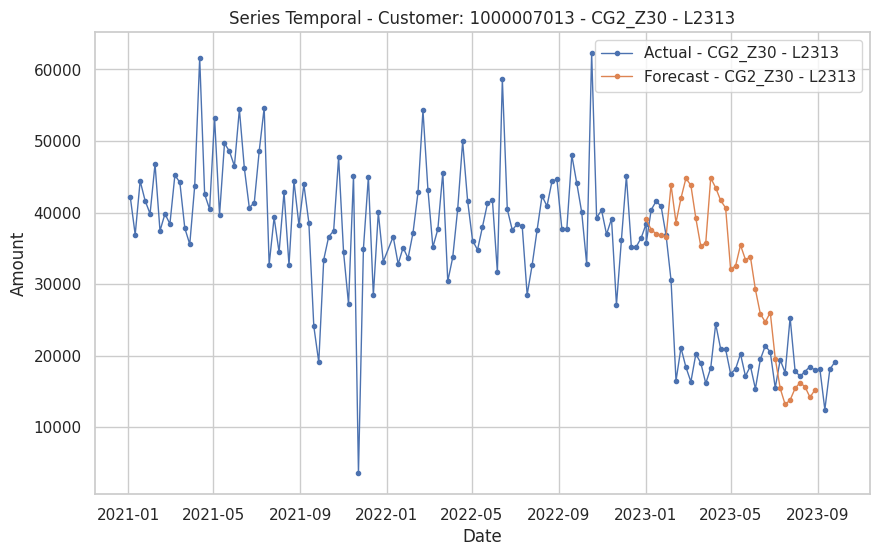

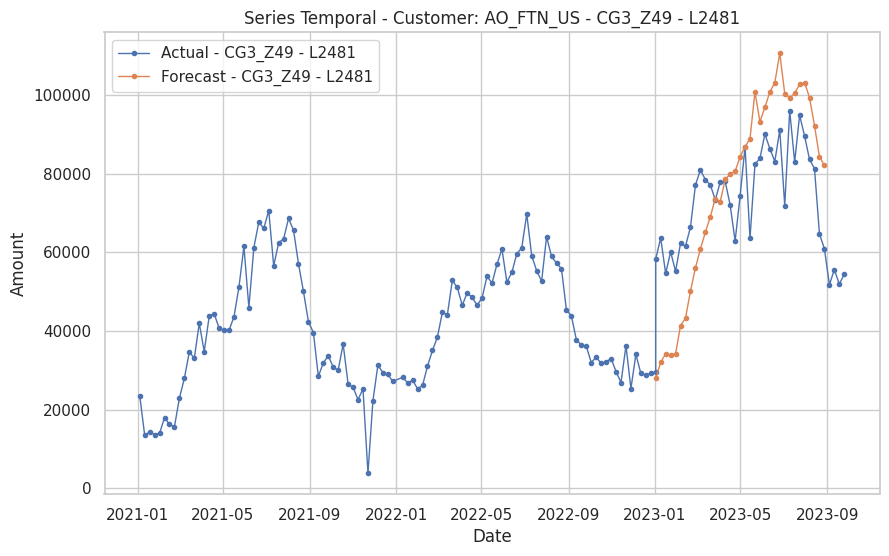

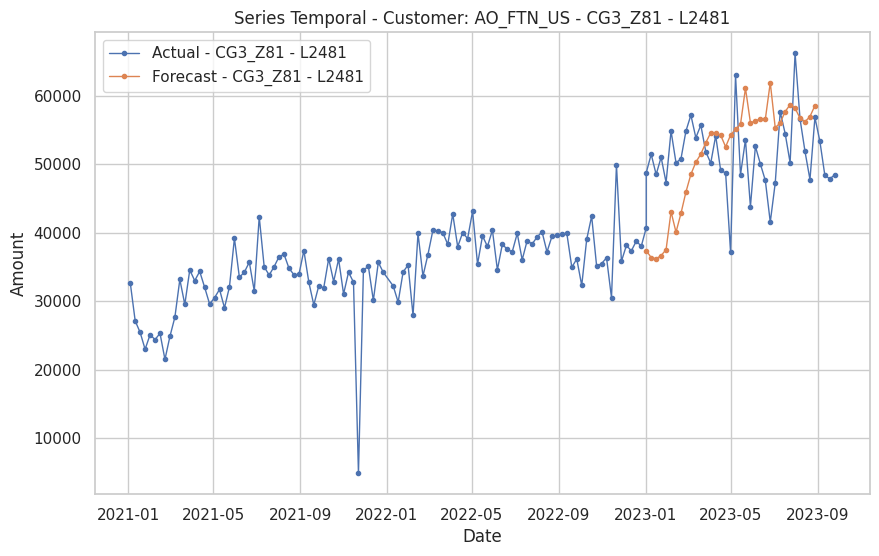

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# Desactivar el estilo de seaborn
sns.set(style="whitegrid")

# Obtener las 10 combinaciones únicas más relevantes de canal, producto y cliente en filtered_df_actual
top_10_combinations = filtered_df_actual.groupby(['SEGMENT/CHANNEL', 'PRODUCT', 'CUSTOMER']).size().nlargest(10).reset_index()

# Iterar sobre cada combinación única
for index, row in top_10_combinations.iterrows():
    # Filtrar por combinación en los DataFrames actual y forecast
    actual_data = filtered_df_actual[
        (filtered_df_actual['SEGMENT/CHANNEL'] == row['SEGMENT/CHANNEL']) &
        (filtered_df_actual['PRODUCT'] == row['PRODUCT']) &
        (filtered_df_actual['CUSTOMER'] == row['CUSTOMER'])
    ]

    forecast_data = filtered_df_forecast[
        (filtered_df_forecast['SEGMENT/CHANNEL'] == row['SEGMENT/CHANNEL']) &
        (filtered_df_forecast['PRODUCT'] == row['PRODUCT']) &
        (filtered_df_forecast['CUSTOMER'] == row['CUSTOMER'])
    ]

    # Crear un gráfico para la combinación actual
    plt.figure(figsize=(10, 6))

    # Plotear la serie temporal actual
    plt.plot(actual_data['DATE'], actual_data['AMOUNT'], label=f"Actual - {row['SEGMENT/CHANNEL']} - {row['PRODUCT']}", linestyle='-', marker='.', linewidth=1, alpha=1)

    # Plotear la serie temporal de predicciones
    plt.plot(forecast_data['DATE'], forecast_data['AMOUNT'], label=f"Forecast - {row['SEGMENT/CHANNEL']} - {row['PRODUCT']}", linestyle='-', marker='.', linewidth=1, alpha=1)

    # Configuraciones adicionales del gráfico
    plt.title(f"Series Temporal - Customer: {row['CUSTOMER']} - {row['SEGMENT/CHANNEL']} - {row['PRODUCT']}")
    plt.xlabel('Date')
    plt.ylabel('Amount')
    plt.legend()
    plt.grid(True)

    # Mostrar el gráfico para la combinación actual
    plt.show()


Como podemos ver las series temporales tienen sentido porque los valores actuales se recojen desde enero del 2021 y los valores predichos son para el 2023, por lo tiene sentido, como hemos visto los errores eran bastante grandes, por eso ahora vemos que no están muy centradas las gráficas y son bastante diferentes.